In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
y[2]
y = y.astype(np.uint8)

<Figure size 640x480 with 1 Axes>

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
from sklearn.linear_model import SGDClassifier#使用随机梯度下降法

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([4], dtype=uint8)

In [9]:
from sklearn.ensemble import RandomForestClassifier#随机森林

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([4], dtype=uint8)

In [10]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0.2, 0. , 0. ]])

In [11]:
from sklearn.model_selection import cross_val_score#3折交叉验证

cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.87082583, 0.87089354, 0.88628294])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
最大迭代次数还没有达到最佳拟合，可考虑增加迭代次数

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]],
      dtype=int64)

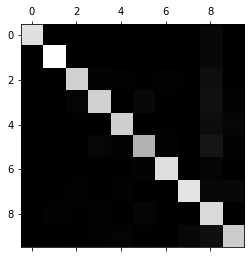

In [14]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [15]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums#求错误率
norm_conf_mx

array([[9.41414824e-01, 0.00000000e+00, 3.54550059e-03, 1.01300017e-03,
        1.51950025e-03, 7.25983454e-03, 6.24683437e-03, 1.01300017e-03,
        3.78186730e-02, 1.68833361e-04],
       [0.00000000e+00, 9.48976565e-01, 5.63630970e-03, 3.41145061e-03,
        5.93295758e-04, 6.52625334e-03, 5.93295758e-04, 1.18659152e-03,
        3.15929991e-02, 1.48323939e-03],
       [4.36388050e-03, 4.53172205e-03, 8.79825445e-01, 1.51057402e-02,
        1.19167506e-02, 4.36388050e-03, 1.04061766e-02, 6.04229607e-03,
        6.22692179e-02, 1.17489090e-03],
       [3.91453270e-03, 2.77279400e-03, 1.90833469e-02, 8.51410863e-01,
        3.26211059e-04, 3.39259501e-02, 4.56695482e-03, 6.52422117e-03,
        6.60577394e-02, 1.14173870e-02],
       [2.05409106e-03, 2.39643958e-03, 8.21636426e-03, 1.71174255e-03,
        8.88736734e-01, 1.71174255e-03, 6.16227319e-03, 4.45053064e-03,
        5.64875043e-02, 2.80725779e-02],
       [5.16509869e-03, 2.76701716e-03, 6.08743774e-03, 3.06216565e-02,
   

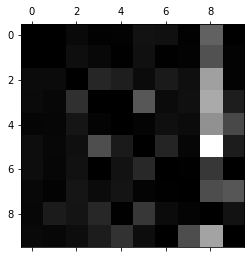

In [16]:
np.fill_diagonal(norm_conf_mx, 0)#用0填充对角线
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

矩阵不对称
第8列：亮，说明很多数字被错误地分类为8
第8行：暗，说明大部分8都被正确分类了
(3, 5)和(5, 3)都比较亮，说明3和5容易被弄混淆

In [17]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [18]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

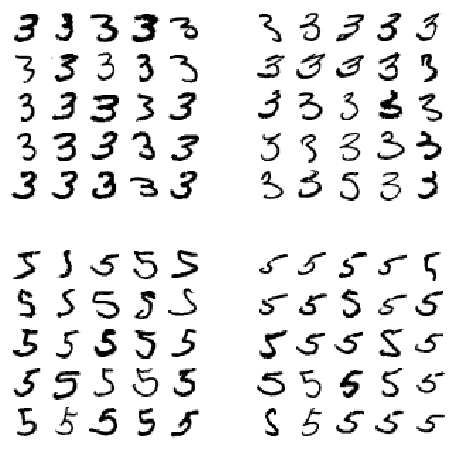

In [19]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

#from scitools.std import plot_digits
plt.figure(figsize = (8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row = 5)

plt.show()